# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page=requests.get(base_url)

In [3]:
soup=BeautifulSoup(page.content,'html.parser')
#print(soup.prettify)

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
ratings = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    for param in parsed_content.find_all("div", {"class": "rating-10"}):
        ratings.append(param.get_text())
    if i==1:
          ratings.pop(0)
    else:
        ratings.pop((i-1)*page_size)


    
    
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
"""
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 10

recommandation = []


# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("td", {"class" : "review-value rating-no"} or {"class" : "review-value rating-yes"}):
#   for para in soup.select("table.review-ratings [review-value rating-no]"):
    
        recommandation.append(para.get_text())

    
    
    print(f"   ---> {len(recommandation)} total reviews")
"""

'\nbase_url = "https://www.airlinequality.com/airline-reviews/british-airways"\npages = 10\npage_size = 10\n\nrecommandation = []\n\n\n# for i in range(1, pages + 1):\nfor i in range(1, pages + 1):\n\n    print(f"Scraping page {i}")\n\n    # Create URL to collect links from paginated data\n    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"\n\n    # Collect HTML data from this page\n    response = requests.get(url)\n\n    # Parse content\n    content = response.content\n    parsed_content = BeautifulSoup(content, \'html.parser\')\n    for para in parsed_content.find_all("td", {"class" : "review-value rating-no"} or {"class" : "review-value rating-yes"}):\n#   for para in soup.select("table.review-ratings [review-value rating-no]"):\n    \n        recommandation.append(para.get_text())\n\n    \n    \n    print(f"   ---> {len(recommandation)} total reviews")\n'

In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df["ratings"] = ratings


In [7]:
df['reviews']=df['reviews'].str.replace('✅ Trip Verified |', '')
df['reviews']=df['reviews'].str.replace('Not Verified', '')
df['reviews']=df['reviews'].str.replace('|', '')

C:\Users\valentin\AppData\Local\Temp\ipykernel_8356\1533052256.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews']=df['reviews'].str.replace('✅ Trip Verified |', '')
C:\Users\valentin\AppData\Local\Temp\ipykernel_8356\1533052256.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews']=df['reviews'].str.replace('|', '')


In [8]:
df['ratings']=df['ratings'].str.replace('\n', '')
df['ratings']=df['ratings'].str.replace('/10', '')

In [9]:
df.head(5)


,reviews,ratings
0,"British Airways is late, their website is at...",1
1,Flew from Amman to London on Nov. 14 2022. No...,4
2,This is the worst experience I have ever had ...,1
3,Flying LHR T5 to CPT November 2022: BA app ...,2
4,Worst experience ever. Outbound flight was c...,1


In [10]:
df.to_csv("E:/Data/British_airways/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [11]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

E:\Anaconda\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\valentin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [12]:
sentiment=df['reviews'].tolist()

In [13]:
analysis = sentiment_pipeline(sentiment, padding=True, truncation=True)

In [14]:
#sentiment_pipeline(sentiment[0:10], padding=True, truncation=True)

In [15]:
res = [label['label'] for label in analysis ]

In [16]:
df['sentiment']=res

In [17]:
df.head()

,reviews,ratings,sentiment
0,"British Airways is late, their website is at...",1,NEGATIVE
1,Flew from Amman to London on Nov. 14 2022. No...,4,NEGATIVE
2,This is the worst experience I have ever had ...,1,NEGATIVE
3,Flying LHR T5 to CPT November 2022: BA app ...,2,NEGATIVE
4,Worst experience ever. Outbound flight was c...,1,NEGATIVE


In [18]:
df['sentiment'].value_counts()

NEGATIVE    710
POSITIVE    290
Name: sentiment, dtype: int64

In [19]:
df['ratings'].value_counts()

1     303
2     113
10    105
3      99
8      80
9      75
7      69
4      60
5      56
6      40
Name: ratings, dtype: int64

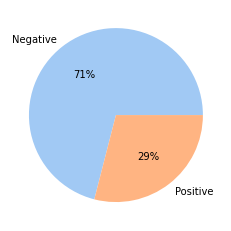

In [20]:

#define data
data = [df['sentiment'].value_counts()["NEGATIVE"], df['sentiment'].value_counts()["POSITIVE"]]
labels = ['Negative', 'Positive']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

TypeError: set_theme() got an unexpected keyword argument 'xlim'

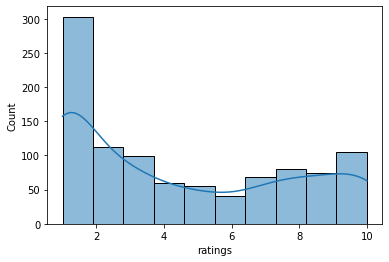

In [22]:
df['ratings'] = df['ratings'].astype('int')
df_ratings = df.sort_values(['ratings']).reset_index(drop=True)
sns.histplot(data=df_ratings, x="ratings", kde=True, bins=10)
sns.set(xlim=(0,10))
            

In [23]:
df.ratings.mean()

4.434

In [24]:
df_neg = df[(df.sentiment == "NEGATIVE")]
df_pos = df[(df.sentiment == "POSITIVE")]

In [ ]:
pip install wordcloud

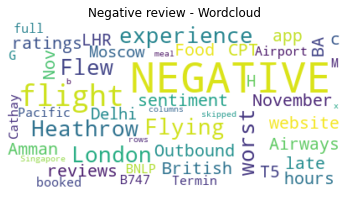

In [25]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

stop_words = list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(df_neg))
plt.figure()
plt.title("Negative review - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

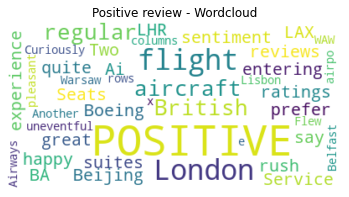

In [26]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

stop_words = list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(df_pos))
plt.figure()
plt.title("Positive review - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()